In [3]:
import pandas as pd

# Read CSV files into DataFrames
sets = pd.read_csv('archive/sets.csv')
inv = pd.read_csv('archive/inventories.csv')
inv_sets = pd.read_csv('archive/inventory_sets.csv')
pieces = pd.read_csv('archive/inventory_parts.csv')
themes = pd.read_csv('archive/themes.csv')

# Select relevant columns for each DataFrame
pieces_df = pieces[['part_num', 'color_id', 'inventory_id']]
inv_df = inv[['id', 'set_num']]
sets_df = sets[['set_num', 'theme_id']]
themes_df = themes[['id', 'name']]

# Merge DataFrames sequentially
merged_df = pd.merge(pieces_df, inv_df, left_on='inventory_id', right_on='id', how='left')
merged_df = pd.merge(merged_df, sets_df, on='set_num', how='left')
merged_df = pd.merge(merged_df, themes_df, left_on='theme_id', right_on='id', how='left')

# Drop redundant 'id' columns
merged_df.drop(['id_x', 'id_y'], axis=1, inplace=True)



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Count the occurrence of each color in a set
color_counts = merged_df.groupby(['set_num', 'color_id']).size().unstack(fill_value=0)

# Merge color counts with theme labels
data = pd.merge(color_counts, merged_df[['set_num', 'name']], left_index=True, right_on='set_num')

# Select features and target variable
X = data.drop(['set_num', 'name'], axis=1)
y = data['name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.9938733832539143


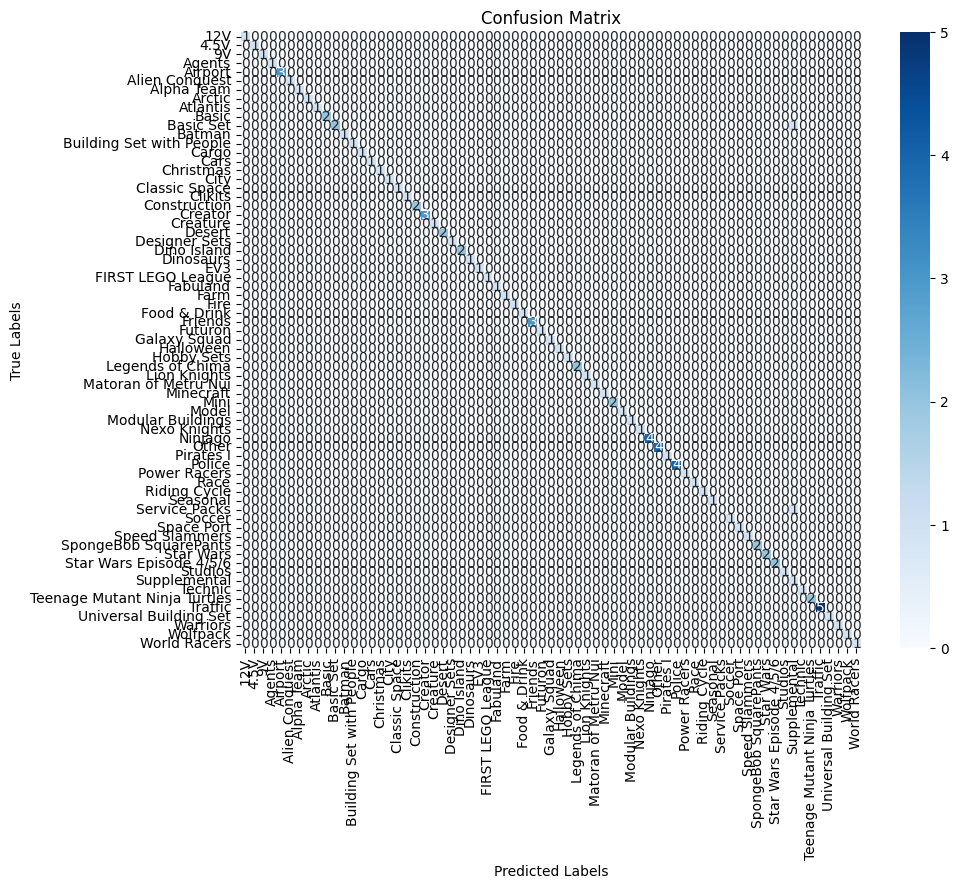

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Create a subset size for easy visualization
subset_size = 100

# Randomly sample a subset of indices
subset_indices = np.random.choice(len(y_test), size=subset_size, replace=False)

# Select the subset of y_test and y_pred
y_test_subset = y_test.iloc[subset_indices]
y_pred_subset = y_pred[subset_indices]

# Compute the confusion matrix for the subset
conf_matrix_subset = confusion_matrix(y_test_subset, y_pred_subset)

# Get the unique classes present in the subset of y_test and y_pred
relevant_classes = np.unique(np.concatenate([y_test_subset, y_pred_subset]))


# Plot the confusion matrix with only the relevant classes
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_subset, annot=True, fmt='d', cmap='Blues', xticklabels=relevant_classes, yticklabels=relevant_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
test_data = pd.DataFrame({
    '0': [0],'1': [0],'2': [0],'3': [0],'4': [0],'5': [0],
    '6': [0],'7': [0],'8': [0],'9': [0],'10': [0],
    '11': [0],'12': [0],'13': [0],'14': [0], '15': [0],
    '16': [0], '17': [0], '18': [0], '19': [0], '20': [0],
    '21': [0], '22': [0], '23': [0], '24': [0], '25': [0],
    '26': [0], '27': [0], '28': [0], '29': [0], '30': [0], 
    '31': [0], '32': [0], '33': [0], '34': [0], '35': [0], 
    '36': [0],'37': [0], '38': [0], '39': [0], '40': [0], 
    '41': [0], '42': [0], '43': [0], '44': [0], '45': [0], 
    '46': [0],'47': [0], '48': [0], '49': [0], '50': [0], 
    '51': [0], '52': [0], '53': [0], '54': [0], '55': [0], 
    '56': [0],'57': [0], '58': [0], '59': [0], '60': [0], 
    '61': [0], '62': [0], '63': [0], '64': [0], '65': [0],
    '66': [0],'67': [0], '68': [0], '69': [0], '70': [0], 
    '71': [0],'72': [0], '73': [0], '74': [0], '75': [0],
    '76': [0], '77': [0],'78': [0], '79': [0], '80': [0], 
    '81': [0], '82': [0], '83': [0], '84': [0], '85': [0], 
    '86': [0], '87': [0], '88': [0], '89': [0], '90': [0], 
    '91': [0], '92': [0], '93': [0], '94': [0], '95': [0], 
    '96': [0], '97': [0], '98': [0], '99': [0], '100': [0], 
    '101': [0], '102': [0], '103': [0], '104': [0], '105': [0], 
    '106': [0], '107': [0], '108': [0], '109': [0], '110': [0], 
    '111': [0], '112': [0], '113': [0], '114': [0], '115': [0],
    '116': [0], '117': [0], '118': [0], '119': [0], '120': [0], 
    '121': [0], '122': [0], '123': [0], '124': [0], '125': [0], 
    '126': [0], '127': [0],'128': [0], '129': [0], '130': [0]
}) #Each number corresponds to a color (look under colors for color_ids), and the eleement represents amount of bricks of that color

# Use the trained decision tree classifier to make predictions on the test data
predicted_themes = clf.predict(test_data)

# Print the predicted themes
print("Predicted Themes:", predicted_themes)

Predicted Themes: ['Technic']


c:\Users\peter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
